
# TP1 — Couleurs & Espaces Colorimétriques

**Auteur :** Loann KAIKA  
**Date :** 2025-09-11 


## 1) Lecture et dimensions — Encodage couleur (BGR vs RGB)

La fonction `cv2.imread()` charge l’image comme une **matrice 3D** de taille **(H, W, 3)**, où **H** est la hauteur (lignes), **W** la largeur (colonnes) et 3 correspond aux canaux couleur. Chaque pixel est donc un vecteur **(B,G,R)** codé sur 8 bits par canal [0;255]. OpenCV utilise l’ordre **BGR** et non RGB.



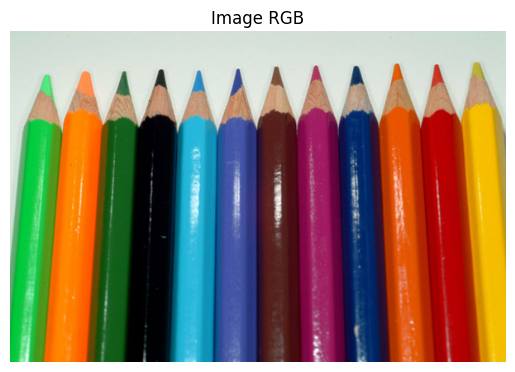

In [26]:

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline

# Chemin de l'image principale
image_path = "C:/Users/loann/Desktop/cv2/Images/Pens.jpg"
image2_path = "C:/Users/loann/Desktop/cv2/Images/MireTV.jpg"
image3_path = "C:/Users/loann/Desktop/cv2/Images/poivrons.jpg"
image4_path = "C:/Users/loann/Desktop/cv2/Images/Car.jpg"

def open_colored_image(path):
    img_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
    if img_bgr is None:
        raise FileNotFoundError(f"Impossible de lire l'image : {path}")
    return img_bgr

img_bgr = open_colored_image(image_path)
img_bgr2 = open_colored_image(image2_path)
img_bgr3 = open_colored_image(image3_path)
img_bgr4 = open_colored_image(image4_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
img_rgb3 = cv2.cvtColor(img_bgr3, cv2.COLOR_BGR2RGB)
img_rgb4 = cv2.cvtColor(img_bgr4, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); 
plt.title("Image RGB"); 
plt.axis("off"); 
plt.show()



## 2) Bande horizontale & profils d'intensité (additivité)

On extrait une **bande horizontale** d’environ 50 lignes au centre de l’image.
Chaque pixel de cette ligne est un vecteur couleur

$$
p(x) = (R(x), G(x), B(x)).
$$

En traçant $R(x), G(x), B(x)$ pour toutes les colonnes $x$, on obtient le **profil d’intensité** des trois canaux.

**Observation :**

* Un objet **rouge** donne $R \gg G,B$.
* Un objet **vert** donne $G \gg R,B$.
* Un objet **bleu** donne $B \gg R,G$.
* Les zones **blanches ou grises** donnent $R \approx G \approx B$.

**Synthèse additive :**
La couleur résulte d’une combinaison pondérée des vecteurs de base
$\mathbf{e}_R=(1,0,0), \mathbf{e}_G=(0,1,0), \mathbf{e}_B=(0,0,1)$.
Les profils mesurés sont donc cohérents avec le modèle RGB additif.



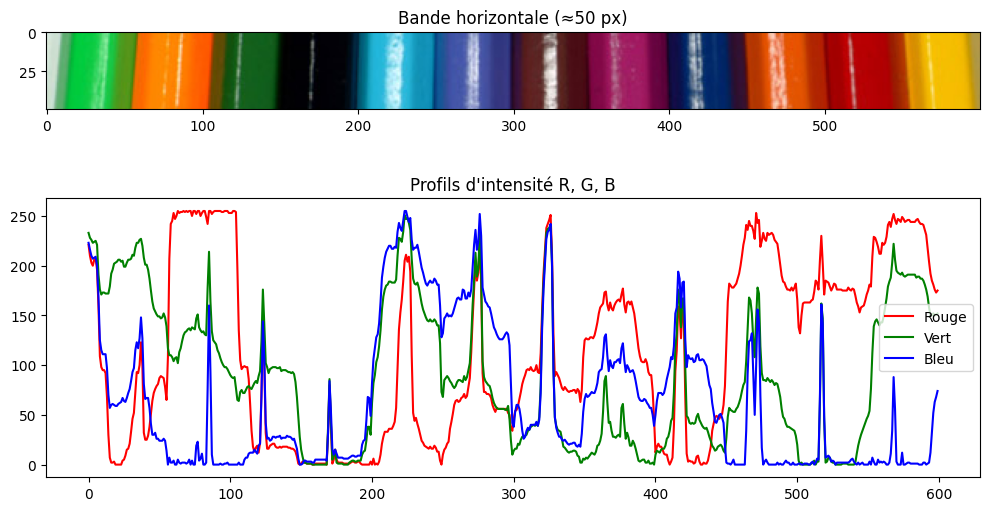

In [27]:
def horizontal_band(img_bgr, height=25):
    # Converti pour Matplotlib
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Ligne centrale
    y = img.shape[0] // 2

    # Profils R, G, B le long de la ligne centrale
    R = img[y, :, 0]
    G = img[y, :, 1]
    B = img[y, :, 2]

    # Affichage
    plt.figure(figsize=(10,6))

    # Bande horizontale de 50 px
    y1 = max(0, y - height)
    y2 = min(img.shape[0], y + height)
    plt.subplot(2, 1, 1)
    plt.imshow(img[y1:y2, :, :])
    plt.title("Bande horizontale (≈50 px)")

    # Profils d'intensité
    plt.subplot(2, 1, 2)
    plt.plot(R, 'r', label="Rouge")
    plt.plot(G, 'g', label="Vert")
    plt.plot(B, 'b', label="Bleu")
    plt.legend()
    plt.title("Profils d'intensité R, G, B")
    plt.tight_layout()
    plt.show()

horizontal_band(img_bgr, height=25)

## 3) Extraction R, G, B et rendu **en niveaux de gris**

### Extraction des canaux R, G, B en niveaux de gris

On sépare l’image couleur en ses trois canaux :

$$
p(x,y) = (R(x,y), G(x,y), B(x,y)).
$$

En affichant chaque canal comme une image **en niveaux de gris**, l’intensité du gris représente directement la valeur du canal ($0$ = noir, $255$ = blanc).

* Un pixel apparaît clair dans le canal **R** s’il contient beaucoup de rouge.
* Il apparaît clair dans le canal **G** s’il contient beaucoup de vert.
* Il apparaît clair dans le canal **B** s’il contient beaucoup de bleu.



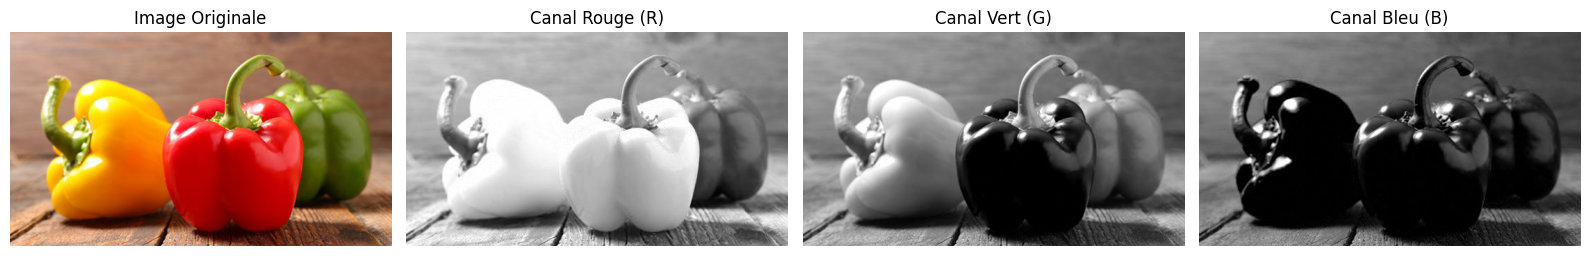

(array([[205, 205, 205, ..., 141, 141, 141],
        [206, 206, 206, ..., 139, 139, 140],
        [209, 209, 209, ..., 138, 138, 138],
        ...,
        [233, 235, 239, ..., 161, 163, 161],
        [244, 238, 235, ..., 167, 175, 176],
        [248, 243, 241, ..., 167, 175, 176]], shape=(309, 550), dtype=uint8),
 array([[168, 168, 168, ...,  96,  96,  96],
        [169, 169, 169, ...,  94,  94,  95],
        [172, 172, 172, ...,  92,  92,  92],
        ...,
        [187, 189, 190, ..., 126, 128, 126],
        [194, 188, 185, ..., 131, 139, 140],
        [198, 193, 191, ..., 131, 139, 140]], shape=(309, 550), dtype=uint8),
 array([[150, 150, 150, ...,  73,  73,  73],
        [151, 151, 151, ...,  71,  71,  72],
        [154, 154, 154, ...,  69,  69,  69],
        ...,
        [153, 155, 157, ..., 107, 109, 107],
        [157, 151, 148, ..., 115, 123, 124],
        [161, 156, 154, ..., 115, 123, 124]], shape=(309, 550), dtype=uint8))

In [28]:
def extract_RGB_to_gray(img_bgr):
    # Séparation des canaux (B, G, R)
    B, G, R = cv2.split(img_bgr)

    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Image Originale")
    axes[0].axis("off")

    axes[1].imshow(R, cmap="gray")
    axes[1].set_title("Canal Rouge (R)")
    axes[1].axis("off")

    axes[2].imshow(G, cmap="gray")
    axes[2].set_title("Canal Vert (G)")
    axes[2].axis("off")

    axes[3].imshow(B, cmap="gray")
    axes[3].set_title("Canal Bleu (B)")
    axes[3].axis("off")

    plt.tight_layout()
    plt.show()

    return R, G, B

extract_RGB_to_gray(img_bgr3)


## 4) Fusion de canaux (BRR, GBB, RRG)

On crée de nouvelles images en remplaçant ou dupliquant certains canaux de l’image d’origine.
Chaque pixel $(R,G,B)$ est transformé en un nouveau vecteur $(C_1,C_2,C_3)$ où $C_i \in \{R,G,B\}$.

* **BRR** : $(B,R,R)$ → le rouge est dupliqué, donnant une image plus rougeâtre.
* **GBB** : $(G,B,B)$ → le bleu est renforcé.
* **RRG** : $(R,R,G)$ → mélange du rouge avec du vert.


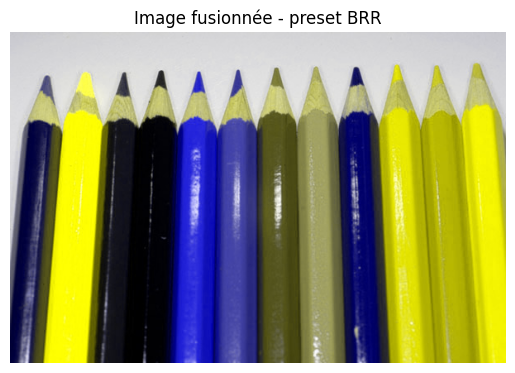

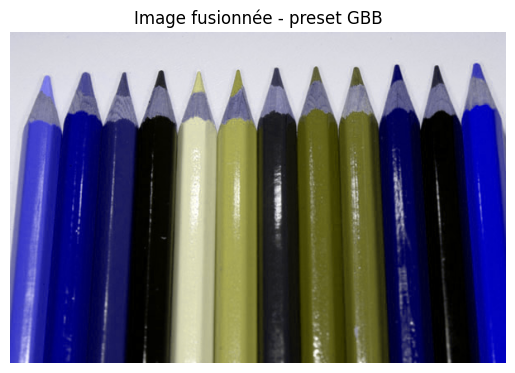

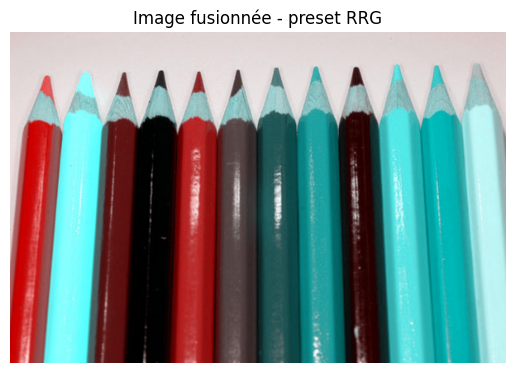

In [29]:
def merge_channels(img_bgr, preset="BRR"):
    # Séparation des canaux
    B, G, R = cv2.split(img_bgr)

    if preset == "BRR":
        merged = cv2.merge((B, R, R)) 
    elif preset == "GBB":
        merged = cv2.merge((G, B, B))
    elif preset == "RRG":
        merged = cv2.merge((R, R, G))
    else:
        raise ValueError("Presets disponibles : BRR, GBB, RRG")

    # Affichage avec Matplotlib
    plt.imshow(cv2.cvtColor(merged, cv2.COLOR_BGR2RGB))
    plt.title(f"Image fusionnée - preset {preset}")
    plt.axis("off")
    plt.show()

merge_channels(img_bgr, preset="BRR")
merge_channels(img_bgr, preset="GBB")
merge_channels(img_bgr, preset="RRG")



## 5) Mise à zéro d’un canal — **Projection** sur un sous‑espace

Mettre un canal à zéro revient à **projeter** chaque pixel $(R,G,B)$ sur le plan défini par les deux autres composantes :

* Si $R=0$, on garde uniquement $(0,G,B)$.
* Si $G=0$, on garde $(R,0,B)$.
* Si $B=0$, on garde $(R,G,0)$.

Cela supprime la contribution de la couleur correspondante et modifie directement la teinte et la saturation de l’image.



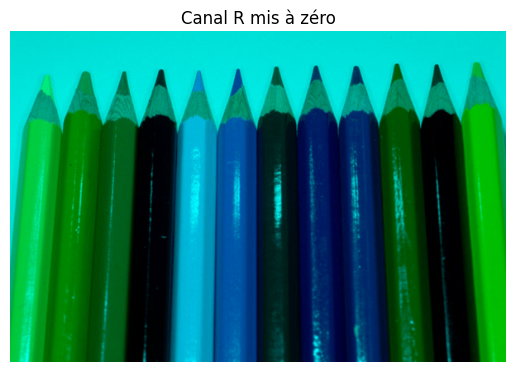

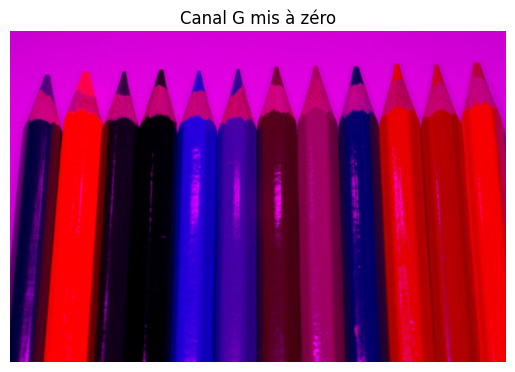

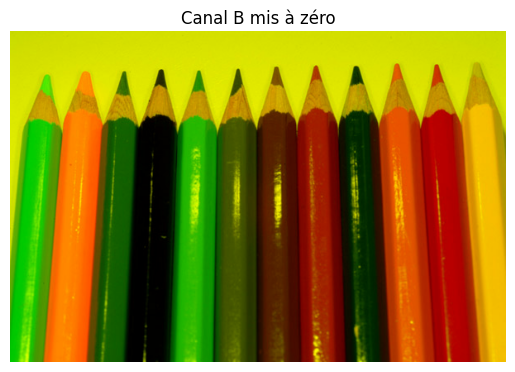

In [30]:

def one_band_to_zero(img_bgr, band="R"):
    B, G, R = cv2.split(img_bgr)
    band = band.upper()

    if band == "R":
        R = np.zeros_like(R)
    elif band == "G":
        G = np.zeros_like(G)
    elif band == "B":
        B = np.zeros_like(B)
    else:
        raise ValueError("band doit être 'B','G' ou 'R'")
    out = cv2.merge((B, G, R))
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title(f"Canal {band} mis à zéro")
    plt.axis("off"); plt.show()
    return out

_ = one_band_to_zero(img_bgr, "R")
_ = one_band_to_zero(img_bgr, "G")
_ = one_band_to_zero(img_bgr, "B")



## 6) Inversion d’un canal — **Transformation affine**

L’inversion d’un canal applique la transformation affine :

$$
c' = 255 - c
$$

pour chaque pixel du canal choisi ($R$, $G$ ou $B$).

* Les zones claires deviennent sombres et inversement.
* Seul le canal sélectionné est inversé, les autres restent inchangés.

Cela correspond à un **complément de couleur** sur un seul axe, modifiant fortement la teinte de l’image.



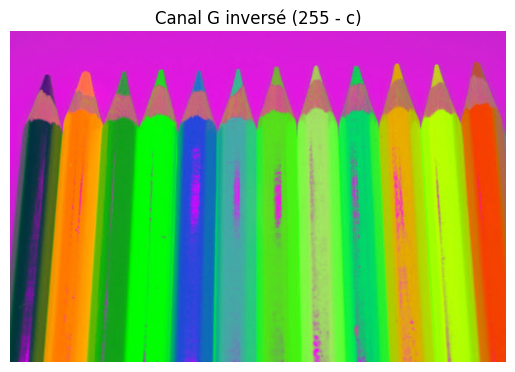

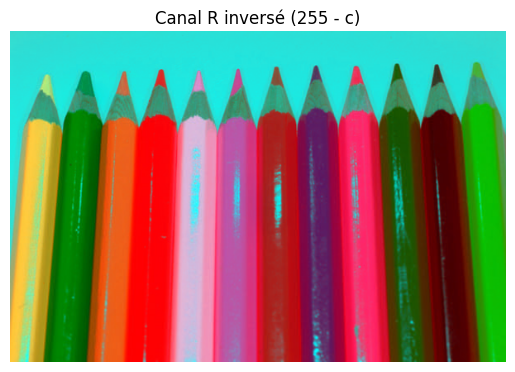

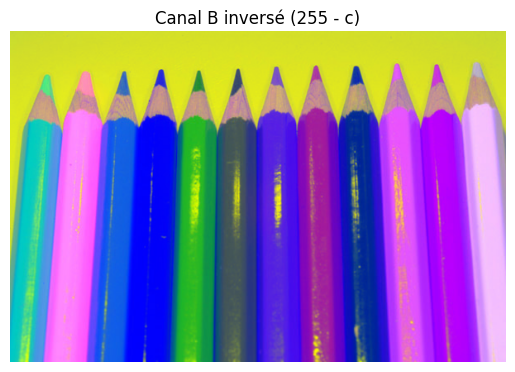

In [31]:

def reverse_one_band(img_bgr, band="R"):
    B, G, R = cv2.split(img_bgr)
    band = band.upper()
    if band == "R":
        R = 255 - R
    elif band == "G":
        G = 255 - G
    elif band == "B":
        B = 255 - B
    else:
        raise ValueError("band doit être 'B','G' ou 'R'")
    out = cv2.merge((B, G, R))
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title(f"Canal {band} inversé (255 - c)")
    plt.axis("off"); plt.show()
    return out

_ = reverse_one_band(img_bgr, "G")
_ = reverse_one_band(img_bgr, "R")
_ = reverse_one_band(img_bgr, "B")



## 7) **Luminance** : trois formules et perception

On compare trois façons de calculer une image en niveaux de gris à partir de $(R,G,B)$ :

* **Moyenne arithmétique**

$$
L = \frac{R+G+B}{3}
$$

→ simple mais ne reflète pas la perception visuelle.

* **Maximum des canaux**

$$
V = \max(R,G,B)
$$

→ met en avant la composante dominante, utile pour des zones saturées.

* **Luminance perceptuelle (BT.601)**

$$
Y = 0.30R + 0.59G + 0.11B
$$

→ pondération tenant compte de la sensibilité de l’œil (forte au vert, moyenne au rouge, faible au bleu).

Ces trois approches produisent des images grises différentes, la formule pondérée $Y$ étant la plus fidèle à la perception humaine.



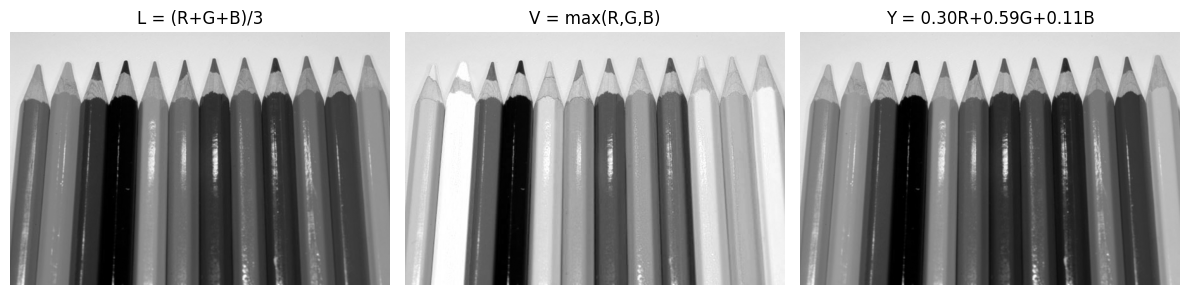

In [32]:

def compare_luminance(img_bgr):
    B, G, R = cv2.split(img_bgr)
    Rf, Gf, Bf = [x.astype(np.float32) for x in (R,G,B)]
    L = ((Rf + Gf + Bf) / 3.0).astype(np.uint8)
    V = np.maximum(np.maximum(R, G), B)
    Y = (0.30*Rf + 0.59*Gf + 0.11*Bf).astype(np.uint8)

    fig, axes = plt.subplots(1,3, figsize=(12,4))
    axes[0].imshow(L, cmap="gray"); axes[0].set_title("L = (R+G+B)/3"); axes[0].axis("off")
    axes[1].imshow(V, cmap="gray"); axes[1].set_title("V = max(R,G,B)"); axes[1].axis("off")
    axes[2].imshow(Y, cmap="gray"); axes[2].set_title("Y = 0.30R+0.59G+0.11B"); axes[2].axis("off")
    plt.tight_layout(); plt.show()
    return L, V, Y

_ = compare_luminance(img_bgr)



## 8–9) Seuillage par canal & combinaison **min/max** (logique AND/OR)

1. **Seuillage par canal**
   On applique un seuil $t_B, t_G, t_R$ indépendamment sur chaque canal :

$$
B_{bin}(x,y) =
\begin{cases}
255 & \text{si } B(x,y) > t_B \\
0   & \text{sinon}
\end{cases}
$$

et de même pour $G_{bin}$ et $R_{bin}$.
On obtient trois images binaires : blanc si le canal est fort, noir sinon.
→ Ces résultats mettent en évidence les zones **fortement bleues, vertes ou rouges** de l’image.

---

2. **Combinaisons min / max**

* **Min (AND logique)** :

$$
M_{min}(x,y) = \min(B_{bin}, G_{bin}, R_{bin})
$$

Un pixel est blanc seulement si les **trois canaux** sont au-dessus de leur seuil.
→ Cela isole les zones très **claires/blanches** (hautes intensités dans R, G et B).

* **Max (OR logique)** :

$$
M_{max}(x,y) = \max(B_{bin}, G_{bin}, R_{bin})
$$

Un pixel est blanc si **au moins un canal** dépasse le seuil.
→ Cela conserve les zones colorées où une composante est dominante.

---

3. **Seuillage sur la luminance perceptuelle**
   On calcule la luminance $Y$ selon la norme BT.601 :

$$
Y = 0.30R + 0.59G + 0.11B
$$

Puis on applique un seuil : $Y > t$.
→ Résultat : une seule image binaire reflétant la **luminosité globale perçue** par l’œil humain, avec plus de fidélité qu’un seuil sur un seul canal.

---

4. **Application des masques**
   On applique chaque masque sur l’image originale :

* Les pixels blancs du masque sont conservés,
* Les pixels noirs sont mis à zéro.

→ Interprétation des résultats :

* `Mmin` conserve seulement les zones blanches/claires.
* `Mmax` conserve les zones colorées (au moins une composante forte).
* `Ybin` conserve les zones **lumineuses globalement**, ce qui correspond mieux à la perception humaine.





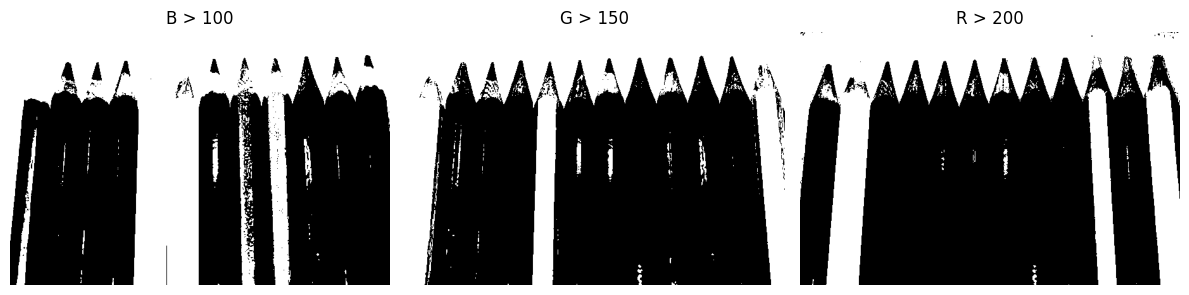

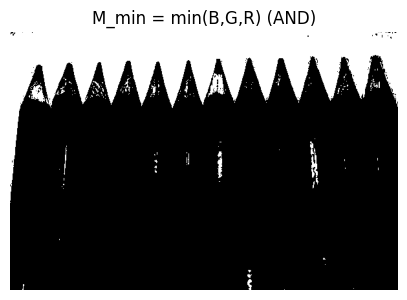

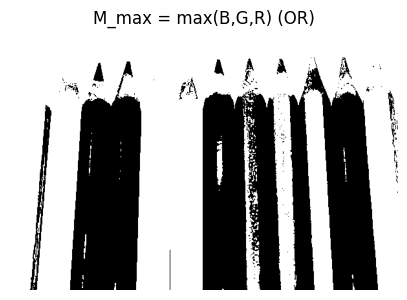

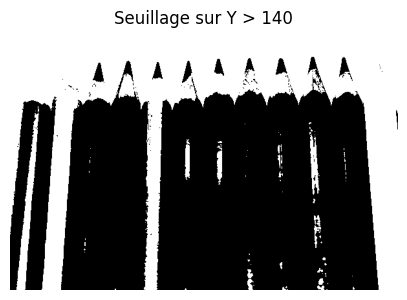

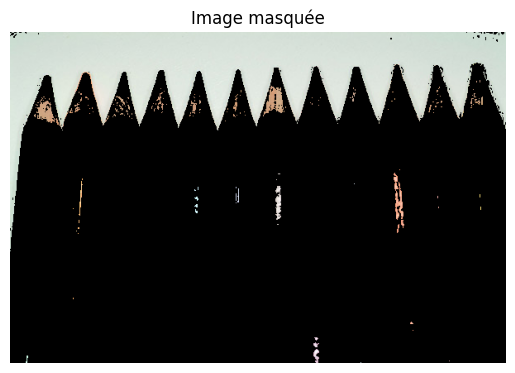

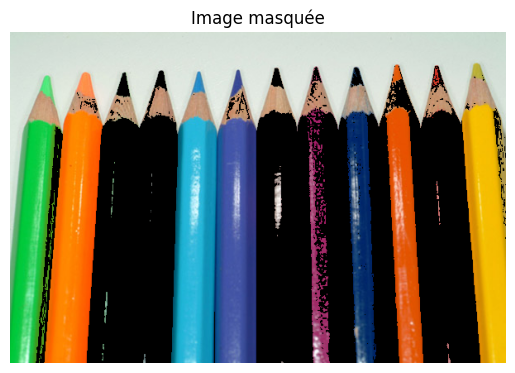

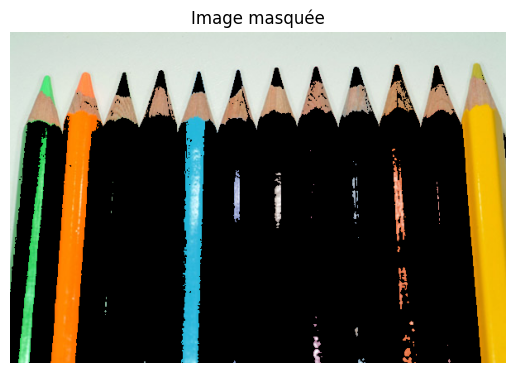

array([[[206, 218, 200],
        [206, 218, 200],
        [207, 219, 201],
        ...,
        [206, 218, 200],
        [207, 219, 201],
        [208, 220, 202]],

       [[209, 221, 203],
        [207, 219, 201],
        [205, 217, 199],
        ...,
        [206, 218, 200],
        [207, 219, 201],
        [208, 220, 202]],

       [[210, 222, 204],
        [206, 218, 200],
        [203, 215, 197],
        ...,
        [207, 219, 201],
        [207, 219, 201],
        [208, 220, 202]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1, 190, 241],
        [  1, 190, 241],
        [  1, 190, 241]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1, 190, 241],
        [  1, 191, 240],
        [  1, 191, 240]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 189, 240],
        [  1, 191, 240],
        [  2, 192, 241]]

In [33]:
def compare_luminance(img_bgr, show=True):
    B, G, R = cv2.split(img_bgr)
    Rf, Gf, Bf = [x.astype(np.float32) for x in (R, G, B)]

    L = ((Rf + Gf + Bf) / 3.0).astype(np.uint8)
    V = np.maximum(np.maximum(R, G), B)
    Y = (0.30*Rf + 0.59*Gf + 0.11*Bf).astype(np.uint8)

    if show:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(L, cmap="gray"); axes[0].set_title("L = (R+G+B)/3"); axes[0].axis("off")
        axes[1].imshow(V, cmap="gray"); axes[1].set_title("V = max(R,G,B)"); axes[1].axis("off")
        axes[2].imshow(Y, cmap="gray"); axes[2].set_title("Y = 0.30R+0.59G+0.11B"); axes[2].axis("off")
        plt.tight_layout(); plt.show()

    return L, V, Y


def threshold_rgb_binary(img_bgr, tB=120, tG=140, tR=160, show=True):
    B, G, R = cv2.split(img_bgr)

    Bbin = (B > tB).astype(np.uint8) * 255
    Gbin = (G > tG).astype(np.uint8) * 255
    Rbin = (R > tR).astype(np.uint8) * 255

    if show:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(Bbin, cmap="gray"); axes[0].set_title(f"B > {tB}"); axes[0].axis("off")
        axes[1].imshow(Gbin, cmap="gray"); axes[1].set_title(f"G > {tG}"); axes[1].axis("off")
        axes[2].imshow(Rbin, cmap="gray"); axes[2].set_title(f"R > {tR}"); axes[2].axis("off")
        plt.tight_layout(); plt.show()

    return Bbin, Gbin, Rbin


def combine_binary_min_max(Bbin, Gbin, Rbin, mode="min"):
    if mode == "min":
        M = np.minimum(np.minimum(Bbin, Gbin), Rbin)
        title = "M_min = min(B,G,R) (AND)"
    elif mode == "max":
        M = np.maximum(np.maximum(Bbin, Gbin), Rbin)
        title = "M_max = max(B,G,R) (OR)"
    else:
        raise ValueError("mode ∈ {'min','max'}")

    plt.figure(figsize=(5, 4))
    plt.imshow(M, cmap="gray"); plt.title(title); plt.axis("off")
    plt.show()
    return M


def apply_mask(img_bgr, mask):
    mask3 = np.dstack([mask, mask, mask])
    out = np.where(mask3 == 255, img_bgr, 0)

    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.title("Image masquée")
    plt.axis("off")
    plt.show()
    return out


Bbin, Gbin, Rbin = threshold_rgb_binary(img_bgr, tB=100, tG=150, tR=200)

Mmin = combine_binary_min_max(Bbin, Gbin, Rbin, mode="min")
Mmax = combine_binary_min_max(Bbin, Gbin, Rbin, mode="max")

_, _, Y = compare_luminance(img_bgr, show=False)
Ybin = (Y > 140).astype(np.uint8) * 255

plt.figure(figsize=(5, 4))
plt.imshow(Ybin, cmap="gray"); plt.title("Seuillage sur Y > 140"); plt.axis("off")
plt.show()

apply_mask(img_bgr, Mmin)
apply_mask(img_bgr, Mmax)
apply_mask(img_bgr, Ybin)



## 10) Conversion d’espace couleur : **YCrCb** et **HSV**

* **YCrCb** sépare la **luminance** (Y) des composantes de chrominance (Cr, Cb).
  → utile en compression vidéo car l’œil est plus sensible aux variations de luminosité qu’aux couleurs.

* **HSV** décompose en **Teinte (H)**, **Saturation (S)** et **Valeur (V)**.
  → plus proche de la perception humaine, pratique pour le traitement basé sur les couleurs (ex. segmentation).

Ces représentations mettent en évidence différentes propriétés de l’image : intensité lumineuse, richesse en couleur et nuances perceptuelles.



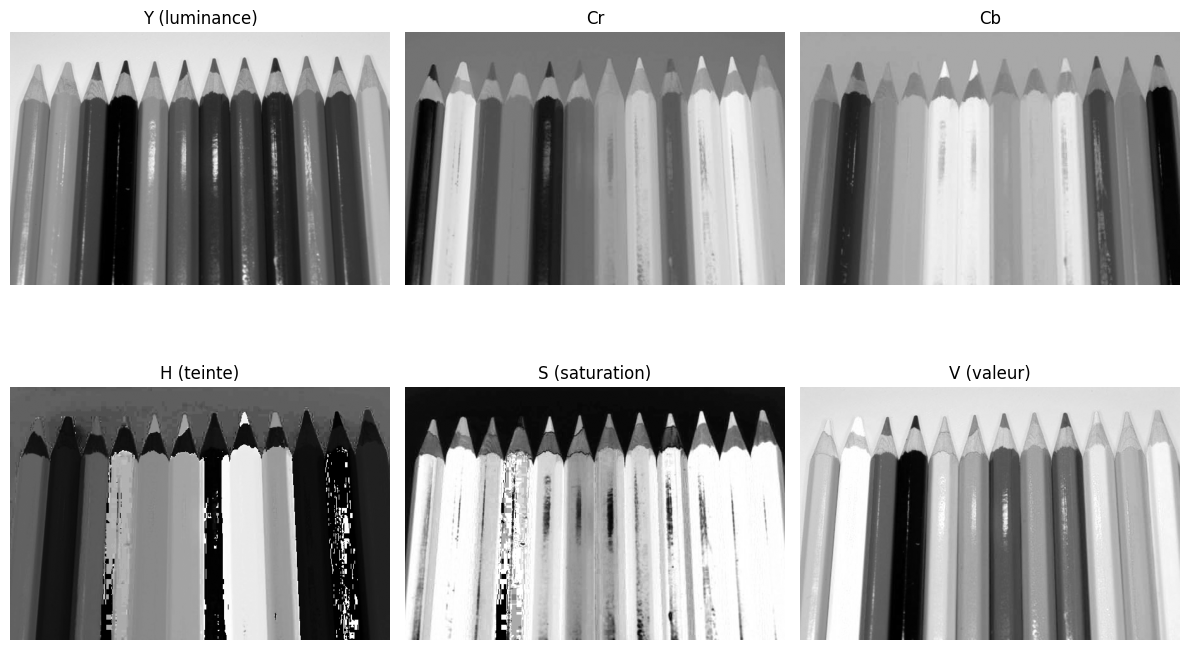

In [34]:

def show_ycrcb_hsv(img_bgr):
    ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    hsv   = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    Y, Cr, Cb = cv2.split(ycrcb)
    H, S, V   = cv2.split(hsv)

    fig, axes = plt.subplots(2,3, figsize=(12,8))
    axes[0,0].imshow(Y, cmap="gray");  axes[0,0].set_title("Y (luminance)"); axes[0,0].axis("off")
    axes[0,1].imshow(Cr, cmap="gray"); axes[0,1].set_title("Cr");            axes[0,1].axis("off")
    axes[0,2].imshow(Cb, cmap="gray"); axes[0,2].set_title("Cb");            axes[0,2].axis("off")
    axes[1,0].imshow(H, cmap="gray");  axes[1,0].set_title("H (teinte)");    axes[1,0].axis("off")
    axes[1,1].imshow(S, cmap="gray");  axes[1,1].set_title("S (saturation)");axes[1,1].axis("off")
    axes[1,2].imshow(V, cmap="gray");  axes[1,2].set_title("V (valeur)");    axes[1,2].axis("off")
    plt.tight_layout(); plt.show()

show_ycrcb_hsv(img_bgr)



## 11) Travail à rendre — Pistes & cellules prêtes à l’emploi

Les points 11a–11c demandent d’utiliser des images spécifiques (`MireTV.jpg`, `Parrots.jpg`, `Pens.jpg`, `Dedeuche.jpg`).  
Ci‑dessous, on fournit des **fonctions génériques** et des **pistes mathématiques** à compléter avec vos images.



### 11.a) Profils sur la mire TV (RGB & YCrCb)

* **Zone colorée (haut, y = 100)** :
  Les profils RGB montrent des paliers nets selon la couleur :

  * Jaune → $R \approx G \gg B$,
  * Rouge → $R \gg G,B$,
  * Bleu → $B \gg R,G$,
  * Blanc → $R \approx G \approx B$.
    La luminance $Y$ est plus élevée pour les couleurs claires (blanc, jaune) et plus faible pour les couleurs sombres (rouge, bleu).

* **Zone de gris (bas)** :
  $R \approx G \approx B$, et le profil $Y$ suit le dégradé du noir au blanc.

**Conclusion** : la mire est conçue pour tester la pureté des composantes RGB et la linéarité de la luminance.



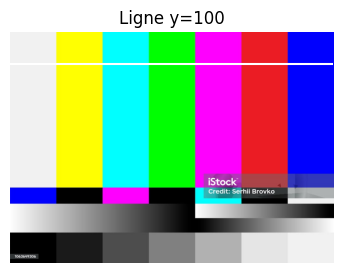

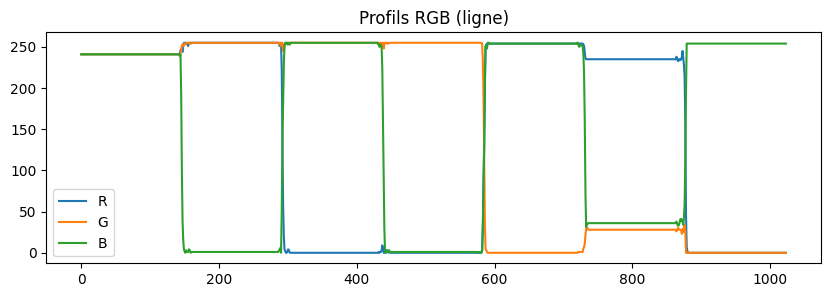

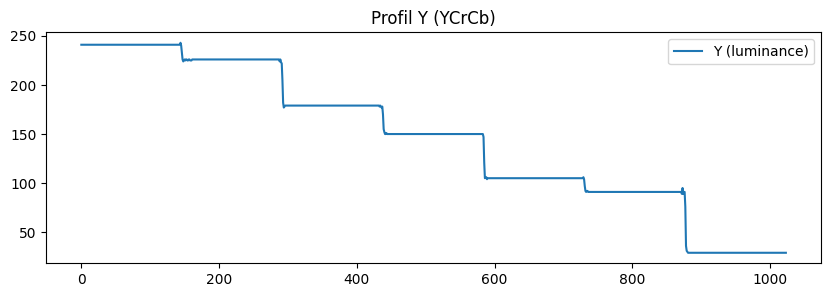

In [35]:

def line_profiles(img_bgr, y):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    R = img[y, :, 0]; 
    G = img[y, :, 1]; 
    B = img[y, :, 2]
    ycrcb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YCrCb)
    Y = ycrcb[y, :, 0]

    plt.figure(figsize=(10,3)); plt.imshow(img); plt.axhline(y, color='w'); plt.title(f"Ligne y={y}"); plt.axis("off"); plt.show()

    plt.figure(figsize=(10,3)); plt.plot(R, label="R"); plt.plot(G, label="G"); plt.plot(B, label="B")
    plt.legend(); plt.title("Profils RGB (ligne)"); plt.show()

    plt.figure(figsize=(10,3)); plt.plot(Y, label="Y (luminance)")
    plt.legend(); plt.title("Profil Y (YCrCb)"); plt.show()

line_profiles(img_bgr2, y=100)



### 11.b) Isolation d’une couleur en espace HSV

Pour isoler une couleur, on convertit l’image en espace **HSV (Teinte, Saturation, Valeur)**.

* On définit un **intervalle de teinte** $H$ correspondant à la couleur recherchée (ex. vert : $35° \leq H \leq 85°$).
* `cv2.inRange()` crée un **masque binaire** :

  $$
  \text{mask}(x,y) =
  \begin{cases}
  255 & \text{si } (H,S,V) \in [H_{\min},H_{\max}] \\
  0   & \text{sinon}
  \end{cases}
  $$
* En appliquant ce masque à l’image d’origine :

  $$
  I_{\text{out}}(x,y) = I_{\text{orig}}(x,y) \cdot \frac{\text{mask}(x,y)}{255}
  $$

  on conserve uniquement les pixels de la couleur choisie.

**Intérêt du HSV** : la teinte $H$ permet de distinguer facilement les couleurs indépendamment de leur luminosité (V) et saturation (S), ce qui rend la segmentation plus robuste qu’en RGB.

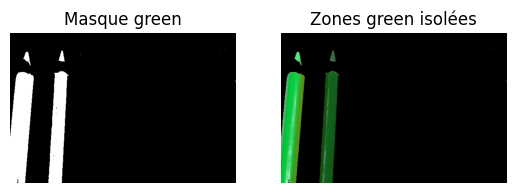

In [39]:
def isolate_color_hsv_simple(img_bgr, color="green"):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    if color == "red":
        mask1 = cv2.inRange(hsv, (0, 80, 60), (10, 255, 255))
        mask2 = cv2.inRange(hsv, (170, 80, 60), (180, 255, 255))
        mask = cv2.bitwise_or(mask1, mask2)
    elif color == "green":
        mask = cv2.inRange(hsv, (35, 60, 60), (85, 255, 255))
    else:
        raise ValueError("color must be 'red' or 'green'")

    # Appliquer le masque
    res = cv2.bitwise_and(img_bgr, img_bgr, mask=mask)

    # Affichage
    plt.subplot(1, 2, 1)
    plt.imshow(mask, cmap="gray")
    plt.title(f"Masque {color}")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.title(f"Zones {color} isolées")
    plt.axis("off")

    plt.show()
    return mask, res

_ = isolate_color_hsv_simple(img_bgr, "green")



### 11.c) Recolorisation d’une zone en HSV*

On souhaite **changer la couleur** d’une région d’image

* L’image est convertie en **HSV**.
* On crée un **masque** pour sélectionner la zone à modifier (ici carrosserie).
* On remplace la **Teinte (H)** des pixels masqués par une valeur constante $H = 60$ correspondant au vert pur.
* Les composantes **Saturation (S)** et **Valeur (V)** sont conservées pour préserver la luminosité et la texture de l’objet.

Formellement, pour chaque pixel $p(x,y)=(H,S,V)$ :

$$
H'(x,y) =
\begin{cases}
H_{\text{cible}} & \text{si } mask(x,y)=255 \\
H(x,y) & \text{sinon}
\end{cases}
$$

Ainsi, on obtient une **nouvelle image recolorisée** où seules les zones ciblées changent de teinte, tout en gardant les ombres et reflets d’origine.


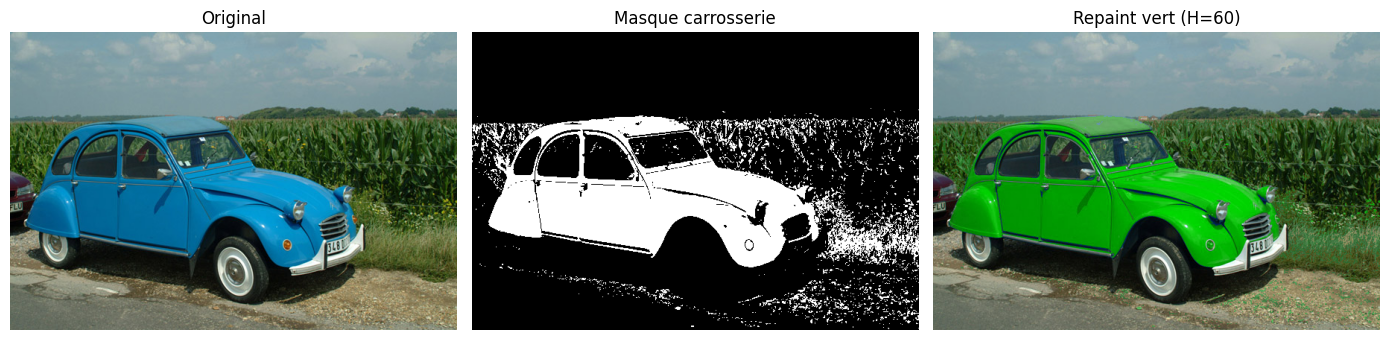

In [47]:

def repaint_to_green(img_bgr, mask=None, target_h=60):
    hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    H,S,V = cv2.split(hsv)
    if mask is None:
        mask = cv2.inRange(hsv, (0,100,100), (180,255,255))

    H2 = H.copy()
    H2[mask==255] = target_h
    hsv2 = cv2.merge((H2,S,V))
    out = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

    fig, axes = plt.subplots(1,3, figsize=(14,4))
    axes[0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)); axes[0].set_title("Original"); axes[0].axis("off")
    axes[1].imshow(mask, cmap="gray"); axes[1].set_title("Masque carrosserie"); axes[1].axis("off")
    axes[2].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); axes[2].set_title("Repaint vert (H=60)"); axes[2].axis("off")
    plt.tight_layout(); plt.show()
    return out

_ = repaint_to_green(img_bgr4)
